In [1]:
import math
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import matplotlib.lines as mlines
import matplotlib.patches as mpatches
from numpy import median
from scipy.stats import ranksums

import numpy as np
import scipy.stats

import os
import fnmatch

figures = 'C:/Users/Fabian/Desktop/Analysis/Round3_FS03_FS06/Figures/'

#### This script is designed to take metadata from specific animal files and then display it as a graph

In [19]:

animal = '//10.153.170.3/storage2/fabian/data/project/FS6/'

result=pd.DataFrame()

for dirpath, dirnames, files in os.walk(animal, topdown=True):
    fullstring = dirpath
    for metadata in files:
        if fnmatch.fnmatch(metadata, 'metadata_*'):
            print(metadata)
            print(dirpath)
            k=(dirpath+'/'+metadata)
            day = pd.read_csv(k,sep=" : ", header=None,engine='python')
            df=day.T
            df= df.rename(columns=df.iloc[0])
            df=df.drop(df.index[0])
            if int(df['Pellets'].values[0])>1:
                result = result.append(df, ignore_index=True,sort=False)
sorted_data = result.sort_values('Computer time was',)
sorted_data

metadata_20200911-182521.txt
//10.153.170.3/storage2/fabian/data/project/FS6/BPositions_FS6_20200911-182521
metadata_20200908-185221.txt
//10.153.170.3/storage2/fabian/data/project/FS6/BPositions_20200908-185221
metadata_20200909-150636.txt
//10.153.170.3/storage2/fabian/data/project/FS6/BPositions_20200909-150636
metadata_20200910-131115.txt
//10.153.170.3/storage2/fabian/data/project/FS6/BPositions_20200910-131115
metadata_20200904-131340.txt
//10.153.170.3/storage2/fabian/data/project/FS6/BPositions_20200904-131340
metadata_20200903-124046.txt
//10.153.170.3/storage2/fabian/data/project/FS6/BPositions_20200903-124046
metadata_20200914-155904.txt
//10.153.170.3/storage2/fabian/data/project/FS6/BPositions_FS6_20200914-155904
metadata_20201028-200327.txt
//10.153.170.3/storage2/fabian/data/project/FS6/BPositions_FS6_20201028-200327
metadata_20200915-180558.txt
//10.153.170.3/storage2/fabian/data/project/FS6/BPositions_FS6_20200915-180558
metadata_20200928-165250.txt
//10.153.170.3/stor

KeyError: 'Pellets'

metadata_20200911-182521.txt
metadata_20200908-185221.txt
metadata_20200909-150636.txt
metadata_20200910-131115.txt
metadata_20200904-131340.txt
metadata_20200903-124046.txt
metadata_20200914-155904.txt
metadata_20201028-200327.txt
metadata_20200915-180558.txt
metadata_20200928-165250.txt
metadata_20200916-182932.txt
metadata_20200917-142012.txt
metadata_20200918-174906.txt
metadata_20200921-145501.txt
metadata_20200922-174631.txt
metadata_20200923-164928.txt
metadata_20200925-170030.txt
metadata_20200924-181211.txt
metadata_20200928-165250.txt
metadata_20200929-163127.txt
metadata_20200930-171324.txt
metadata_20201001-202637.txt
metadata_20201002-175631.txt
metadata_20201005-155314.txt
metadata_20201006-190205.txt
metadata_20201029-191628.txt
metadata_20201008-190236.txt
metadata_20201009-184008.txt
metadata_20201007-184900.txt
metadata_20201012-183930.txt
metadata_20201013-190307.txt
metadata_20201014-170500.txt
metadata_20201015-172356.txt
metadata_20201019-204631.txt
metadata_20201

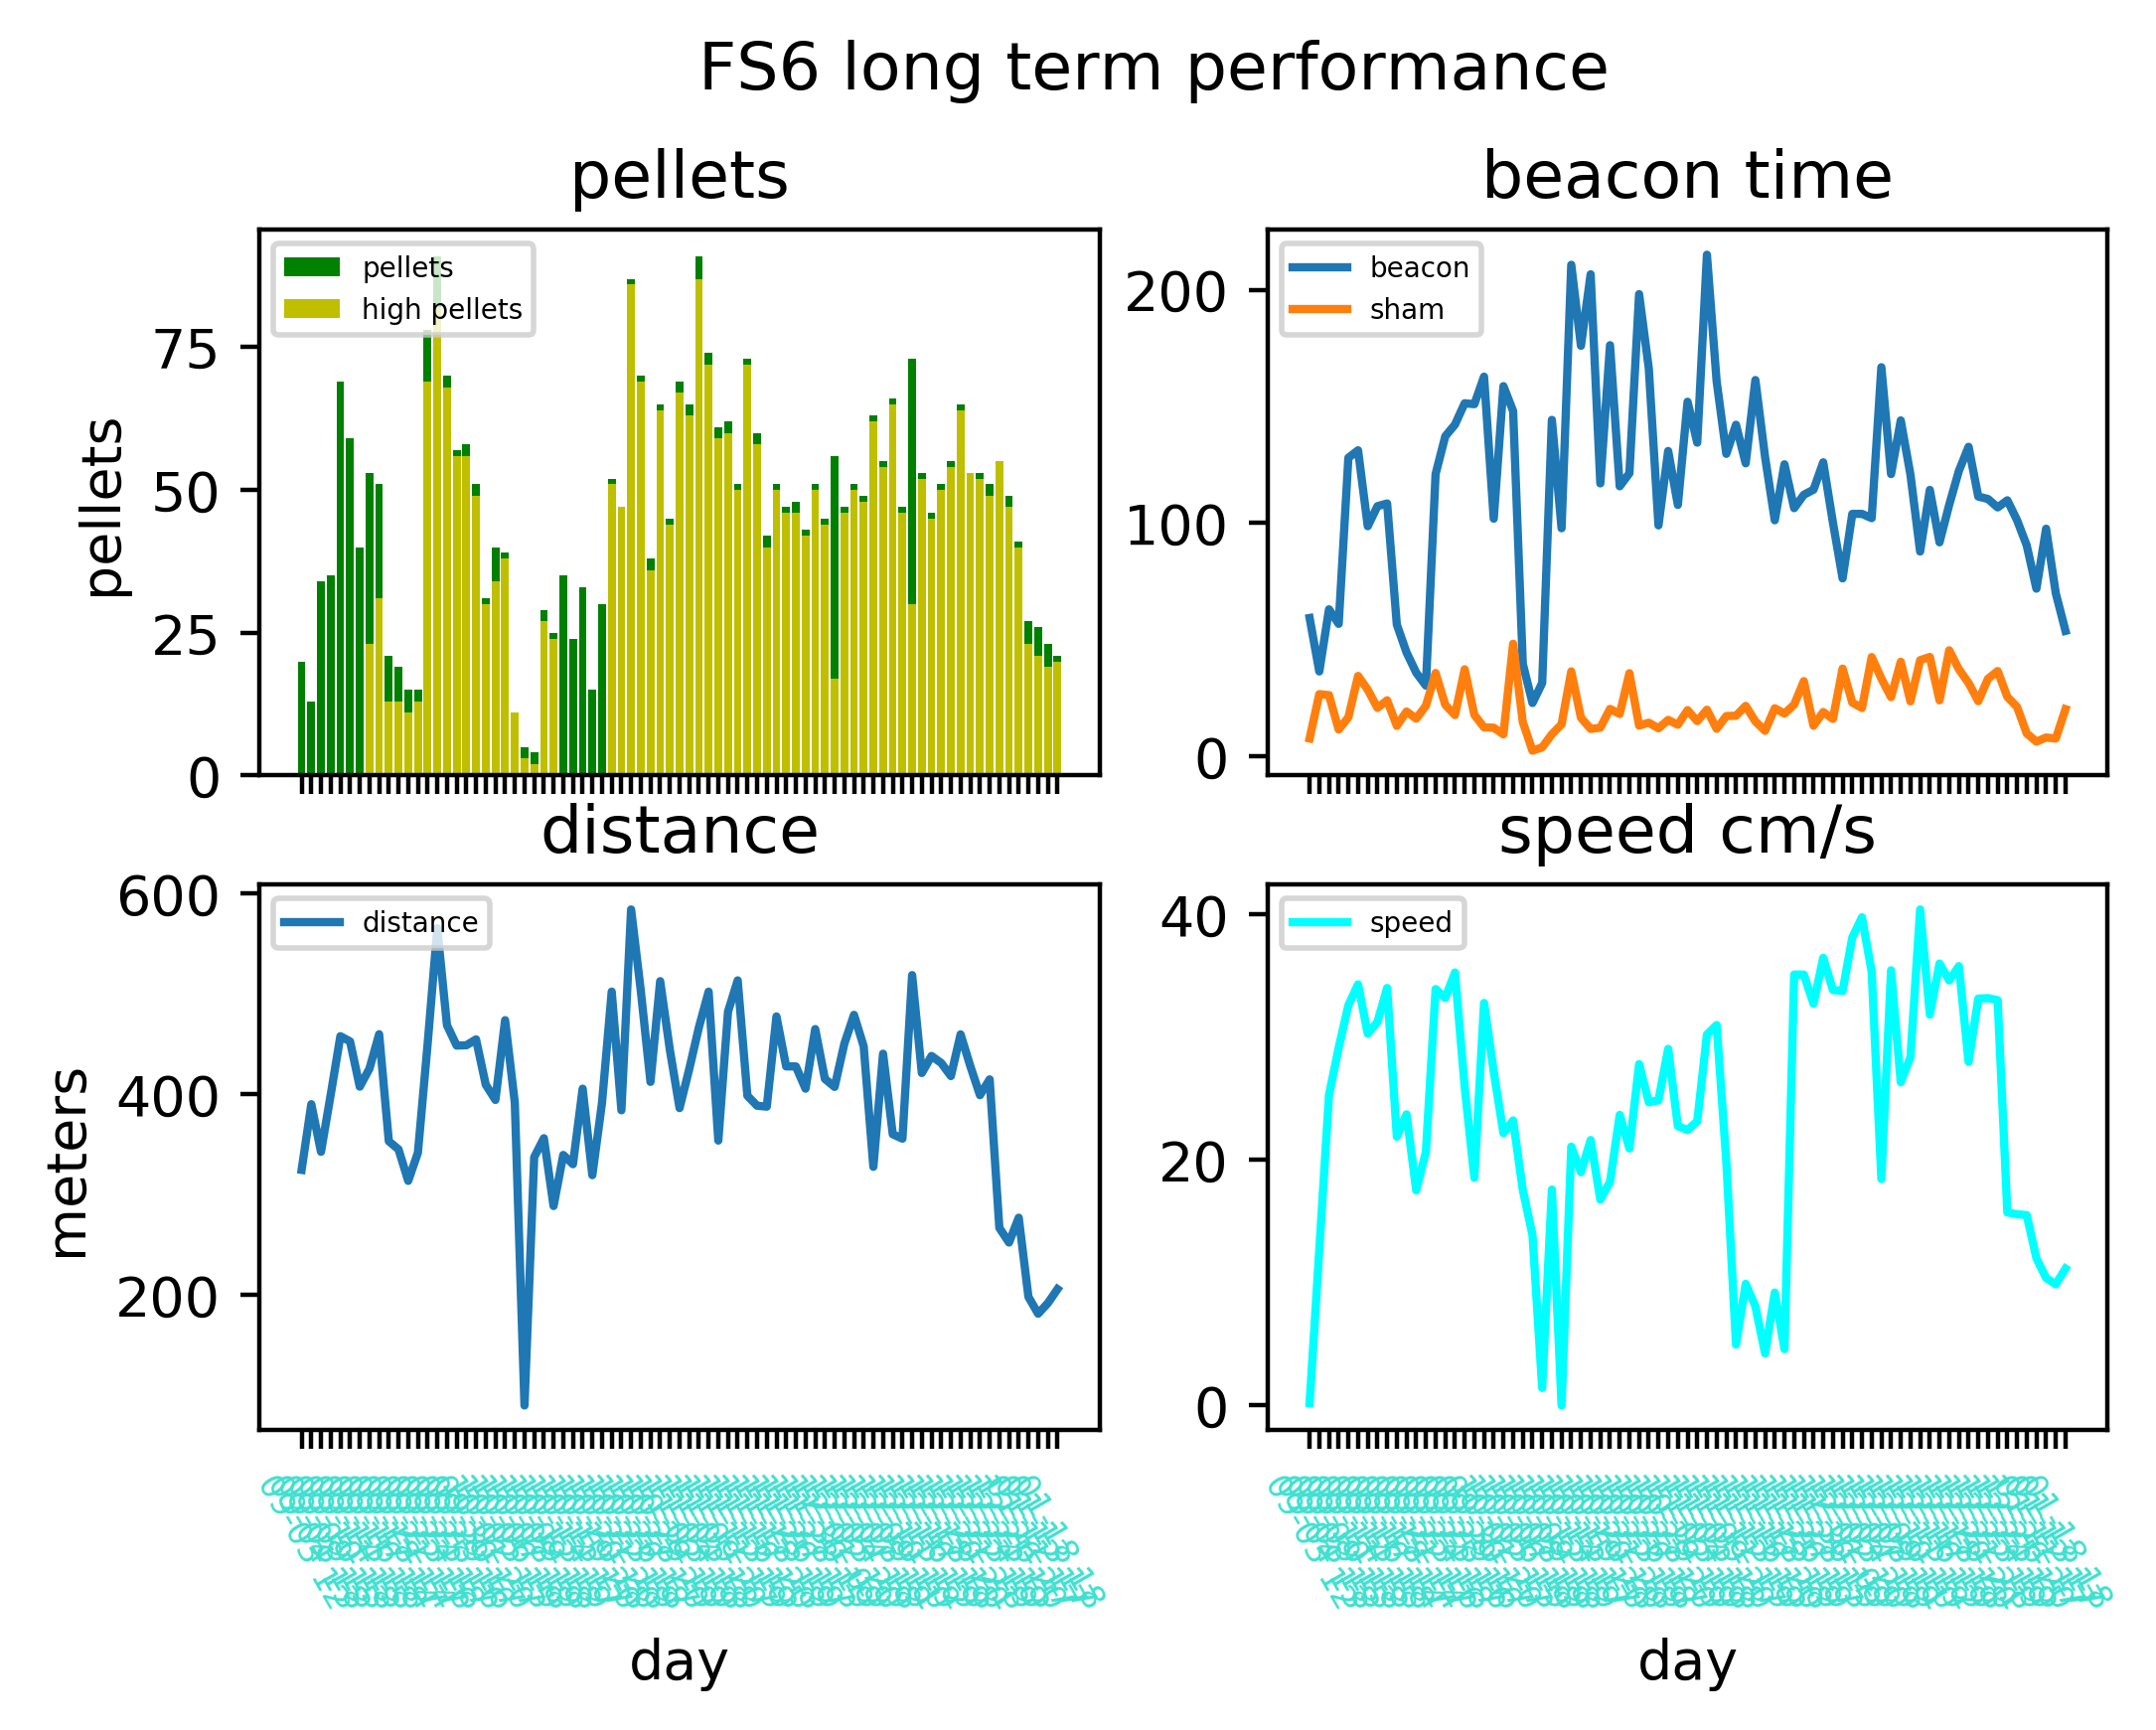

In [22]:
make_graphs('FS6')

In [21]:
def make_graphs (animal_ID):
    result=pd.DataFrame()

    for dirpath, dirnames, files in os.walk(animal, topdown=True):
        fullstring = dirpath
        for metadata in files:
            if fnmatch.fnmatch(metadata, 'metadata_*'):
                print(metadata)
                k=(dirpath+'/'+metadata)
                day = pd.read_csv(k,sep=" : ", header=None,engine='python')
                df=day.T
                df= df.rename(columns=df.iloc[0])
                df=df.drop(df.index[0])
                try:
                    if int(df['Pellets'].values[0])>1:
                        result = result.append(df, ignore_index=True,sort=False)
                except KeyError:
                    print("Bad session")
    sorted_data = result.sort_values('Computer time was',)
    sorted_data
    day_list_short=[]
    for day in sorted_data['Recording started on']:
        day_list_short.append(day[5:13])
    sorted_data['Pellets']= sorted_data['Pellets'].astype(int)
    sorted_data['high pellets']=sorted_data['high pellets'].astype(float)
    sorted_data['Sham']=sorted_data['Sham'].astype(float)
    sorted_data['Beacon']=sorted_data['Beacon'].astype(float)
    sorted_data['Distance']=sorted_data['Distance'].astype(float)
    sorted_data['Speed']=sorted_data['Speed'].astype(float)
    sorted_data['position_change']=sorted_data['position_change'].astype(int)
    sorted_data['light_off']=sorted_data['light_off'].astype(int)
    sorted_data['time_in_cylinder'] =  sorted_data['time_in_cylinder'].astype(float)
    sorted_data['background_color'] = sorted_data['background_color'].astype(str)
    
    plt.tight_layout
    fig, ax = plt.subplots(2,2,dpi=400,sharex=True)
    fig.suptitle(animal_ID +' long term performance',y=1)
    ax[0][0].bar(day_list_short,sorted_data['Pellets'],label='pellets',color ='g')
    ax[0][0].bar(day_list_short,sorted_data['high pellets'],label='high pellets',color ='y')
    ax[0][0].set_title('pellets')
    ax[0][0].legend(loc='upper left',prop={'size': 5})
    ax[1][1].set_xlabel('day')
    ax[1][0].set_xlabel('day')
    ax[0][0].set_ylabel('pellets')


    ax[0][1].plot(day_list_short,sorted_data['Beacon'],label = 'beacon')
    ax[0][1].plot(day_list_short,sorted_data['Sham'],label = 'sham')
    ax[0][1].legend(loc='upper left',prop={'size': 5})
    ax[0][1].set_title('beacon time')
    #ax[0][1].set_ylabel('time in beacon')


    ax[1][0].plot(day_list_short,sorted_data['Distance'], label = 'distance')
    ax[1][0].legend(loc='upper left',prop={'size': 5})
    ax[1][0].set_title('distance')
    ax[1][0].set_ylabel('meters')
    ax[1][0].tick_params(axis="x", labelsize=6, labelrotation=-60, labelcolor="turquoise")


    


    ax[1][1].plot(day_list_short,sorted_data['Speed'],label= 'speed',color = 'cyan')
    ax[1][1].legend(loc='upper left',prop={'size': 5})
    ax[1][1].set_title('speed cm/s')
    ax[1][1].tick_params(axis="x", labelsize=6, labelrotation=-60, labelcolor="turquoise")

    #fig.tight_layout()#pad=3.0
    
    #plt.show()
    plt.savefig('%sephys_long_term_perfomance %s.png'%(figures,animal_ID), dpi = 300)



    day_number = 0
    for day in sorted_data['Pellets']:

    
    
    
    
        print("%s Pellets dispensed : %s required time in cylinder %s background color: %s position change every: %s, invisible every: %s rear time reguired: %s" 
              %(day_list_short[day_number],day,sorted_data['time_in_cylinder'][day_number],
                sorted_data['background_color'][day_number],sorted_data['position_change'][day_number],
                sorted_data['light_off'][day_number],sorted_data['high_time_in_cylinder'][day_number]))

        day_number+=1
    
    